<a href="https://colab.research.google.com/github/DheerajKondan/titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
d1 = pd.read_csv("/content/Titanic-Dataset.csv")
d1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
d1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
d1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
d1["Name"].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [ ]:
#new column 'FamilySize'
d1['FamilySize'] = d1['SibSp'] + d1['Parch'] + 1

In [ ]:
d1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2


In [ ]:
d1['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
d1['Embarked'].tail(10)

,Embarked
881,S
882,S
883,S
884,S
885,Q
886,S
887,S
888,S
889,C
890,Q


In [ ]:
age_imputer = SimpleImputer(strategy='median')
d1['Age'] = age_imputer.fit_transform(d1[['Age']])

In [ ]:
# Ensure the column is correctly formatted as a 1D array
embarked_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation, but flatten the result to avoid any dimensionality issues
d1['Embarked'] = embarked_imputer.fit_transform(d1[['Embarked']]).ravel()

# Fill missing values in 'Cabin' with 'Unknown'
d1['Cabin'] = d1['Cabin'].fillna('Unknown')


In [ ]:
d1['Embarked'].head(10)

,Embarked
0,S
1,C
2,S
3,S
4,S
5,Q
6,S
7,S
8,S
9,C


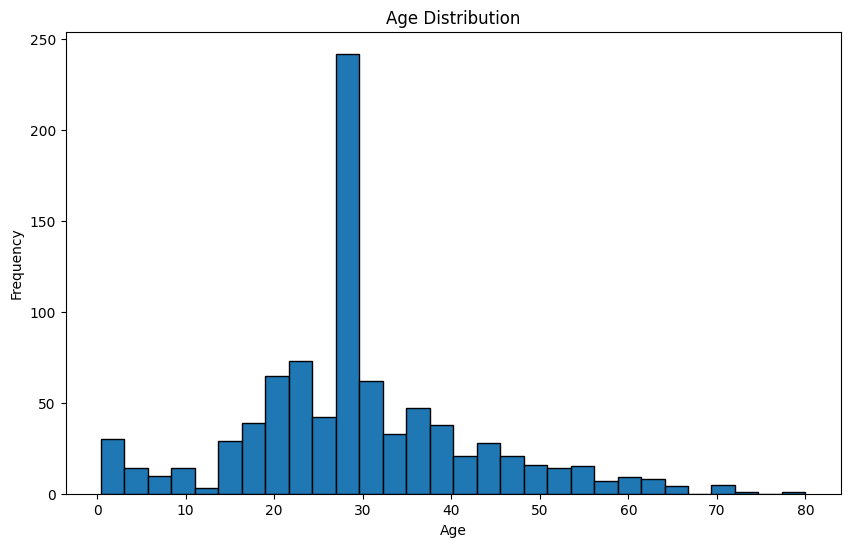

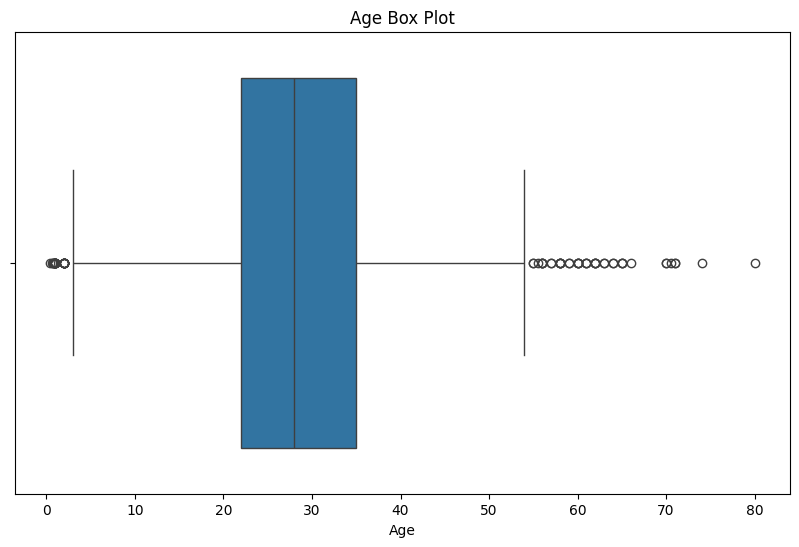

<ipython-input-38-98ea5bfe500c>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d1['Age'].dropna(), shade=True)


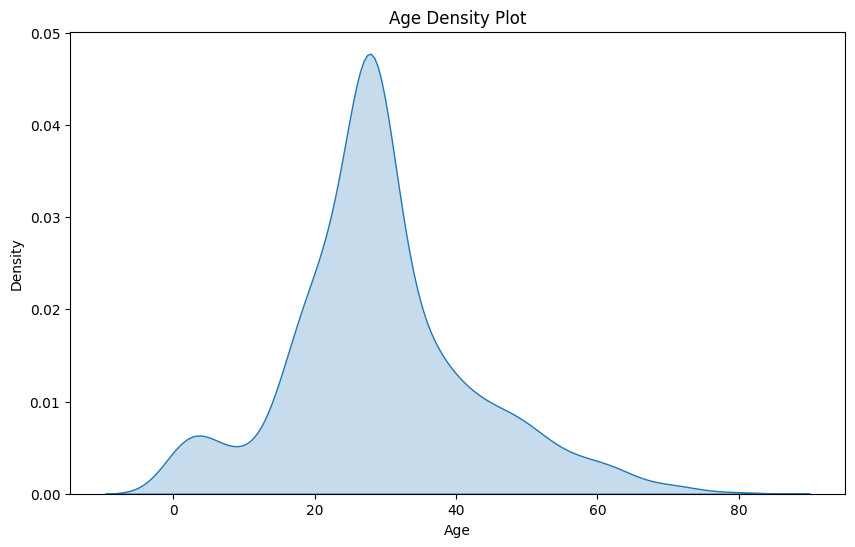

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(d1['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=d1)
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.show()

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(d1['Age'].dropna(), shade=True)
plt.title('Age Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

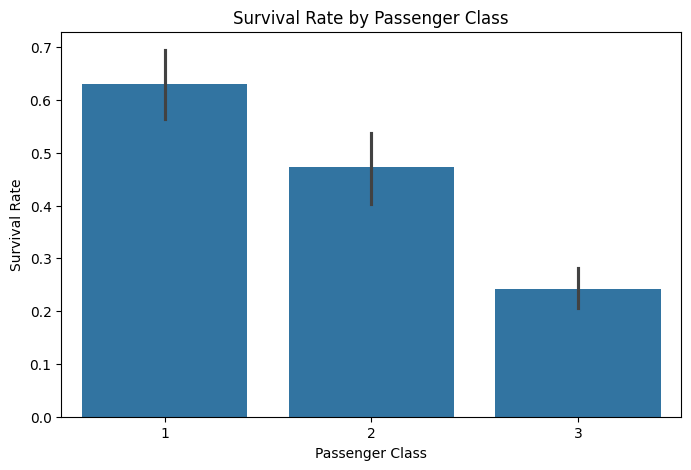

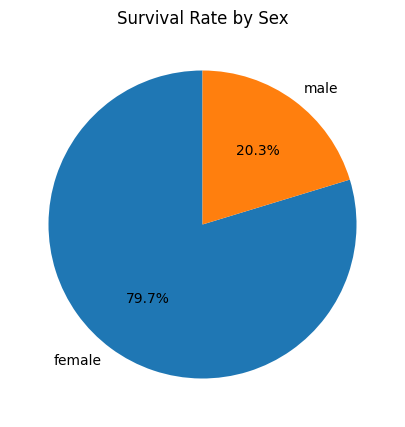

In [ ]:
# Bar Chart for Pclass and Survival
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=d1)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Pie Chart for Sex and Survival
survived_sex = d1.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(8, 5))
survived_sex.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate by Sex')
plt.ylabel('')
plt.show()

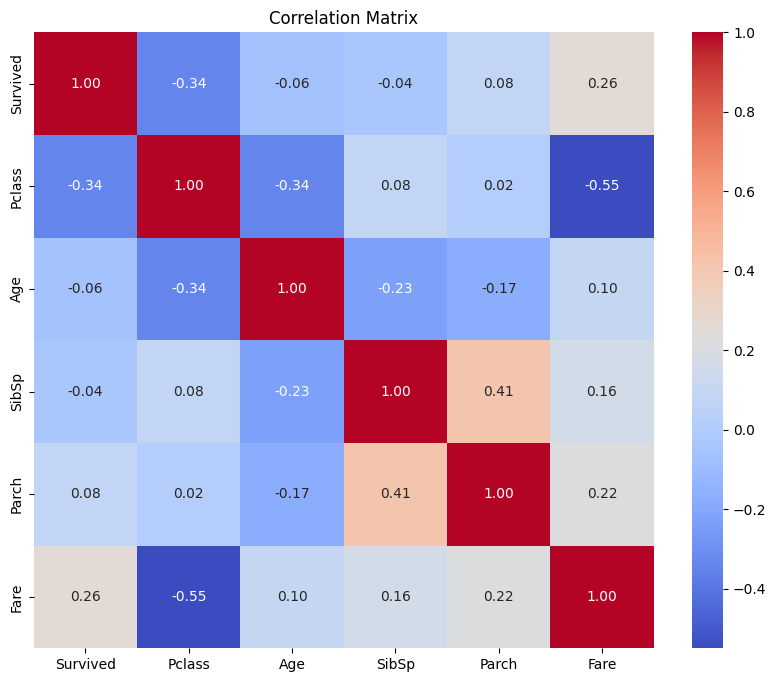

In [ ]:
# Correlation Matrix
corr_matrix = d1[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
d1.shape

(891, 13)

In [ ]:
# Print each column name on a new line
for col in d1.columns:
    print(col)


PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked
FamilySize


In [ ]:
d1.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [ ]:
d1["Fare"].max

<bound method Series.max of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

In [ ]:
d1.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S,5


In [ ]:
d1['Age'].fillna(d1['Age'].median(), inplace=True)
d1['Fare'].fillna(d1['Fare'].median(), inplace=True)

X = d1[['Age', 'Fare']].values
y = d1['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n\n\n",X);
print("\n\n\n",y);
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Training the Logistic Regression model
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)





 [[22.      7.25  ]
 [38.     71.2833]
 [26.      7.925 ]
 ...
 [28.     23.45  ]
 [26.     30.    ]
 [32.      7.75  ]]



 [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 

LogisticRegression(random_state=42)

In [ ]:

print("\n\n\n X_train",X_train);
print("\n\n\n X_test",X_test);
print("\n\n\n y_train",y_train);
print("\n\n\n y_test",y_test);





 X_train [[ 1.25364106 -0.07868358]
 [-0.47728355 -0.37714494]
 [ 0.21508629 -0.47486697]
 ...
 [ 0.90745614 -0.35580399]
 [-1.1696534   1.68320121]
 [-0.63114352  0.86074761]]



 X_test [[-9.26336398e-02 -3.33900778e-01]
 [ 1.38156309e-01 -4.25283869e-01]
 [-7.08073503e-01 -4.74866965e-01]
 [-1.78509326e+00  7.96648968e-03]
 [-1.16965340e+00 -4.11002011e-01]
 [-2.46493606e-01  8.90834443e-01]
 [-9.26336398e-02 -4.78236690e-01]
 [-1.01579343e+00 -2.80867083e-01]
 [-1.01579343e+00 -4.78236690e-01]
 [-7.85003486e-01 -1.21367407e-01]
 [ 5.99736206e-01  3.95003477e-01]
 [ 1.13824609e+00 -4.72460019e-01]
 [-9.26336398e-02 -1.37091507e-01]
 [ 6.12263260e-02 -4.88345865e-01]
 [ 5.22806223e-01 -3.77144940e-01]
 [-1.01579343e+00  1.31202147e-01]
 [ 9.84386120e-01  3.84493786e-01]
 [-9.26336398e-02 -4.76711649e-01]
 [-1.69563623e-01 -3.77144940e-01]
 [ 1.36903603e+00  3.73822348e-01]
 [-4.00353571e-01 -4.75429228e-01]
 [ 3.68946257e-01 -1.16231946e-01]
 [-7.85003486e-01 -4.76230260e-01]
 [-7

In [ ]:
pred=classifier.predict(X_test)

In [ ]:
for x in range(len(X_test)):
  print(y_test[x],pred[x])

1 0
0 0
0 0
1 0
1 0
1 1
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
1 0
1 1
0 0
1 1
0 0
1 1
0 0
1 1
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 1
0 0
0 0
1 0
0 0
1 1
1 0
1 1
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
1 1
0 0
0 0
0 0
1 1
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 0
0 0
1 0
1 0
1 0
0 0
1 1
1 0
0 1
0 0
0 0
0 0
1 0
0 0
0 0
1 1
1 0
1 0
0 0
1 0
1 0
0 1
0 0
0 0
1 0
1 0
0 0
1 0
1 0
1 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
1 1
0 0
0 0
0 0
1 0
0 0
0 0
1 1
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0


In [ ]:
confusion_matrix(y_test,pred)

array([[100,   5],
       [ 58,  16]])

In [ ]:
accuracy_score(y_test,pred)

0.6480446927374302

<ipython-input-52-51d5840fa147>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label=j)


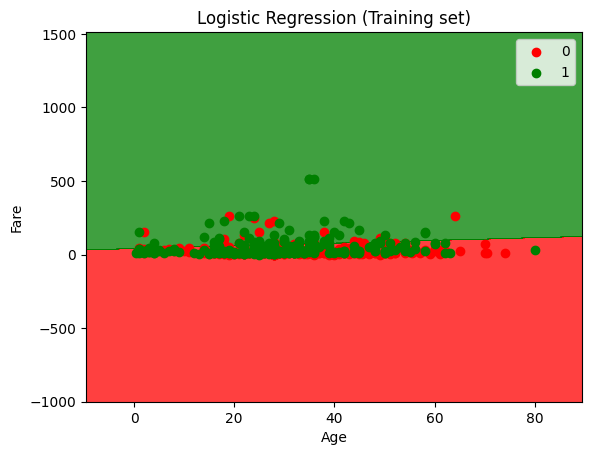

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set = sc.inverse_transform(X_train),y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-10,stop=x_set[:,0].max()+10, step=1),np.arange(start=x_set[:,1].min()-1000,stop=x_set[:,1].max()+1000,step = 1))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
alpha=0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
print(type(X))
X = pd.DataFrame(X)

<class 'numpy.ndarray'>


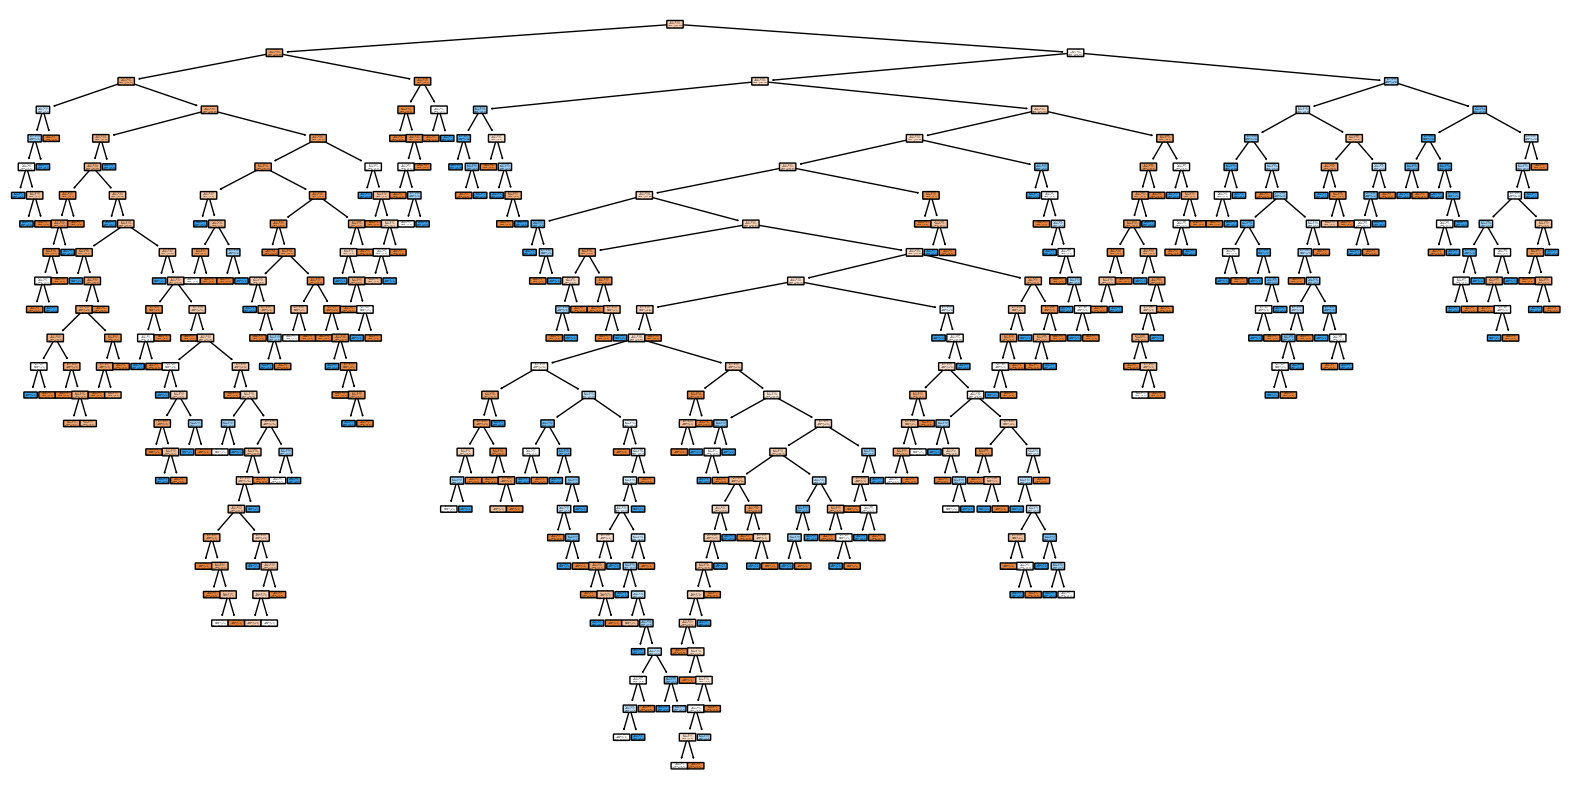

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nROC AUC: {roc_auc}')

Accuracy: 0.6759776536312849
Precision: 0.6428571428571429
Recall: 0.4864864864864865
F1 Score: 0.5538461538461539
ROC AUC: 0.7175675675675676


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'CV Average Score: {cv_scores.mean()}')

CV Average Score: 0.6667378067917896


In [ ]:
grouped = d1.groupby('Pclass')['Survived'].mean()
print(grouped)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
d1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
d1["Sex"]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
d1["Sex"] = le.fit_transform(d1["Sex"])
d1["Embarked"]=le.fit_transform(d1["Embarked"])

In [ ]:
d1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Unknown,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,Unknown,2,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,1


In [ ]:
import plotly.express as px
fig = px.scatter_3d(d1,x='Survived',y='Fare',z='Age',color='Fare',
                    size='Survived',title="size--> Survived	    color--> Fare" )
fig.show()
